# Exploratory DIA analysis
### Ira Horecka, Winter 2022, Hannes Roest

## As stated in rotation README by Hannes:
For Ira's Rotation project Hannes is interested in mapping the raw data in a DIA run OSW results. 


1. How much of the raw data is currently explained by the OSW features
2. Is the raw data "used twice" 
    - One raw data is mapped to multiple library entries 

Also look at this on the MS1 level. 

In [1]:
import os

import pandas as pd
import pyopenms as pms

BASE_DIR = os.path.dirname(os.path.realpath("__file__"))
DATA_DIR = os.path.join(BASE_DIR, 'data')

Determination of memory status is not supported on this 
 platform, measuring for memoryleaks will never fail


In [128]:
# Read 2400-2700 RT window SWATH file - format TSV
swath_tsv_path = os.path.join(DATA_DIR, 'run_1330_0_pyprophet_output_2400_2700_RT_700Swath.tsv')
swath_tsv = pd.read_csv(swath_tsv_path, sep="\t")
swath_tsv.head()

,id_run,id_peptide,transition_group_id,decoy,run_id,filename,RT,assay_rt,delta_rt,iRT,...,Charge,mz,Intensity,aggr_prec_Peak_Area,aggr_prec_Peak_Apex,RT_leftWidth,RT_rightWidth,peak_group_rank,d_score,m_score
0,-3635800775910245364,168629,571,0,-3635800775910245364,../../../2021-09-16-CalibratedLibraryPy3/mzml/...,2697.96,2788.883056,-90.923056,40.189148,...,2,712.8859,2968.01,1823.356445,533.672064,2690.414062,2699.343750,2.0,0.854111,0.068830
1,-3635800775910245364,7482,830,0,-3635800775910245364,../../../2021-09-16-CalibratedLibraryPy3/mzml/...,2609.32,2444.188210,165.131790,38.788108,...,2,723.3385,2154.01,17603.246094,3834.683030,2600.658691,2611.462891,1.0,-0.082185,0.159605
2,-3635800775910245364,7482,830,0,-3635800775910245364,../../../2021-09-16-CalibratedLibraryPy3/mzml/...,2416.66,2444.187681,-27.527681,35.613998,...,2,723.3385,3120.01,32910.914062,9055.394695,2403.811279,2423.454834,2.0,-0.597191,0.210172
3,-3635800775910245364,7482,830,0,-3635800775910245364,../../../2021-09-16-CalibratedLibraryPy3/mzml/...,2581.07,2444.187480,136.882520,38.319273,...,2,723.3385,3311.01,5678.909668,1176.703051,2579.069580,2589.849609,3.0,-1.592275,0.261939
4,-3635800775910245364,7482,830,0,-3635800775910245364,../../../2021-09-16-CalibratedLibraryPy3/mzml/...,2678.77,2444.185922,234.584078,39.860776,...,2,723.3385,3977.00,17530.015625,3289.267249,2676.129395,2690.414062,5.0,-1.615050,0.262411


In [2]:
# Read corresponding mzML file and load it into pyopenms object
swath_exp = pms.MSExperiment()
swath_mzml_path = os.path.join(DATA_DIR, 'mzML', "Rost_DIApy3_SP2um_90min_250ngK562_100nL_1_Slot1-5_1_1330_6-28-2021_0_2400_to_2700_swath_700.mzML")

pms.MzMLFile().load(swath_mzml_path, swath_exp)

## Loading demo mzML file to TOPPView - observations
mzML relative filepath: ./data/mzML/Rost_DIApy3_SP2um_90min_250ngK562_100nL_1_Slot1-5_1_1330_6-28-2021_0_2400_to_2700_swath_700.mzML

Observations:
    
    - 168 total indices range(168)
    - Each index usually has an outstanding peak @ 712.5 m/z, with many subtler peaks on either side
    - RT window of 2400 - 2700
    - TOPPView shows only MS2 spectra
    
As an exercise, extract features observed in TOPPView using `pyopenms`

In [121]:
# Get total spectra count
print("Total spectra:", swath_exp.getNrSpectra())

# Count number of unique MS levels in spectra
from collections import Counter

swath_ms_levels = [spect.getMSLevel() for spect in swath_exp]
print("MS levels for all spectra:", dict(Counter(swath_ms_levels)))

Total spectra: 168
MS levels for all spectra: {2: 168}


In [122]:
# Continue data discovery
demo = swath_exp[1]
mz, intensity = demo.get_peaks()
# Max intensities found per spectrum
max_intensities = []

for idx, spec in enumerate(swath_exp):
    mz, intensity = spec.get_peaks()
    # Get maximum intensity of each spectrum
    max_intensities.append(max(list(zip(intensity, mz))))

# Print grouped m/z count for max intensity - most should lie around ~710 m/z
mz_max_intensities = dict(Counter([int(i[1]) for i in max_intensities]))
print('Most common m/z values in max intensity spectrum:', sorted(mz_max_intensities.items(), key=lambda x: x[1], reverse=True))
# Check RT range is between 2400-2700 m/z
rt = [spec.getRT() for spec in swath_exp]
print("RT range:", min(rt), max(rt))

Most common m/z values in max intensity spectrum: [(705, 19), (713, 16), (720, 16), (709, 15), (711, 10), (820, 9), (710, 8), (718, 5), (708, 5), (701, 5), (702, 5), (912, 4), (815, 4), (834, 4), (804, 3), (651, 3), (637, 3), (877, 3), (890, 3), (567, 3), (847, 2), (727, 2), (800, 2), (707, 2), (700, 2), (867, 2), (717, 2), (909, 1), (958, 1), (699, 1), (706, 1), (776, 1), (746, 1), (724, 1), (574, 1), (976, 1), (1019, 1), (716, 1)]
RT range: 2400.240718 2699.343844


## Working with Josh in exploring mzML file

Required files

    - run_1330_0_pyprophet_output_2400_2700_RT_700Swath.tsv
        Cols of interest:
        - m_score (corrected q_value - q<0.01 is considered significant)
        - peak_group
        - RT_leftWidth
        - RT_rightWidth
        - mz
        - assay_RT
        - IM
        - delta IM
    - merged_-1.osw
        Tables of interest:
        - feature_transition
        - transition_id

In [122]:
# 'run_1330_0_pyprophet_output_2400_2700_RT_700Swath.tsv' is already loaded in `swath_tsv`
# as a pandas dataframe
swath_tsv.shape

(3210, 28)

In [123]:
swath_tsv.head()

,id_run,id_peptide,transition_group_id,decoy,run_id,filename,RT,assay_rt,delta_rt,iRT,...,Charge,mz,Intensity,aggr_prec_Peak_Area,aggr_prec_Peak_Apex,RT_leftWidth,RT_rightWidth,peak_group_rank,d_score,m_score
0,-3635800775910245364,168629,571,0,-3635800775910245364,../../../2021-09-16-CalibratedLibraryPy3/mzml/...,2697.96,2788.883056,-90.923056,40.189148,...,2,712.8859,2968.01,1823.356445,533.672064,2690.414062,2699.343750,2.0,0.854111,0.068830
1,-3635800775910245364,7482,830,0,-3635800775910245364,../../../2021-09-16-CalibratedLibraryPy3/mzml/...,2609.32,2444.188210,165.131790,38.788108,...,2,723.3385,2154.01,17603.246094,3834.683030,2600.658691,2611.462891,1.0,-0.082185,0.159605
2,-3635800775910245364,7482,830,0,-3635800775910245364,../../../2021-09-16-CalibratedLibraryPy3/mzml/...,2416.66,2444.187681,-27.527681,35.613998,...,2,723.3385,3120.01,32910.914062,9055.394695,2403.811279,2423.454834,2.0,-0.597191,0.210172
3,-3635800775910245364,7482,830,0,-3635800775910245364,../../../2021-09-16-CalibratedLibraryPy3/mzml/...,2581.07,2444.187480,136.882520,38.319273,...,2,723.3385,3311.01,5678.909668,1176.703051,2579.069580,2589.849609,3.0,-1.592275,0.261939
4,-3635800775910245364,7482,830,0,-3635800775910245364,../../../2021-09-16-CalibratedLibraryPy3/mzml/...,2678.77,2444.185922,234.584078,39.860776,...,2,723.3385,3977.00,17530.015625,3289.267249,2676.129395,2690.414062,5.0,-1.615050,0.262411


In [124]:
# Get swath_tsv where `m_score` is < 0.01
sig_swath_tsv = swath_tsv[swath_tsv['m_score'] < 0.01]

# What percent are sig?
print(f"% significant transitions: {round(sig_swath_tsv.shape[0] / swath_tsv.shape[0], 3) * 100}%")

% significant transitions: 8.6%


In [125]:
# Declare columns of interest
cols_interest = ['id_run', 'id_peptide', 'transition_group_id', 'peak_group_rank',
                 'RT_leftWidth', 'RT_rightWidth', 'mz', 'assay_rt', 'IM', 'delta_im',
                 'm_score']
sig_swath_tsv[cols_interest].head(20)

,id_run,id_peptide,transition_group_id,peak_group_rank,RT_leftWidth,RT_rightWidth,mz,assay_rt,IM,delta_im,m_score
13,-3635800775910245364,90813,2067,1.0,2622.177490,2649.336182,719.8805,2675.581879,1.050059,-0.003509,0.000649
16,-3635800775910245364,168815,2315,1.0,2532.495361,2555.746338,720.3578,2502.000500,0.953968,-0.003532,0.000015
19,-3635800775910245364,91690,2854,1.0,2473.461914,2489.545654,724.3661,2431.406177,1.037768,-0.004482,0.000008
20,-3635800775910245364,91690,2854,2.0,2443.097168,2462.740479,724.3661,2431.403258,1.027409,-0.014841,0.008254
25,-3635800775910245364,92083,3265,1.0,2672.557129,2688.630127,709.3381,2715.605607,0.951570,0.026874,0.000008
37,-3635800775910245364,94223,5384,1.0,2443.097168,2462.740479,715.3588,2145.316635,1.066235,-0.000008,0.000654
38,-3635800775910245364,94423,5578,1.0,2443.097168,2464.525391,707.3614,2462.982534,1.072348,0.004522,0.000002
41,-3635800775910245364,94733,5820,1.0,2493.121094,2518.155762,709.3621,2586.040058,1.013508,-0.003598,0.000002
43,-3635800775910245364,94992,6012,1.0,2575.497803,2604.229736,707.3646,2683.835965,1.013300,0.005641,0.000009
45,-3635800775910245364,95023,6036,1.0,2469.889893,2498.479980,708.8701,2524.182185,1.020349,-0.015464,0.000015


In [126]:
swath_tsv[cols_interest].head(20)

,id_run,id_peptide,transition_group_id,peak_group_rank,RT_leftWidth,RT_rightWidth,mz,assay_rt,IM,delta_im,m_score
0,-3635800775910245364,168629,571,2.0,2690.414062,2699.343750,712.8859,2788.883056,1.015006,-0.010396,0.068830
1,-3635800775910245364,7482,830,1.0,2600.658691,2611.462891,723.3385,2444.188210,1.012386,-0.017635,0.159605
2,-3635800775910245364,7482,830,2.0,2403.811279,2423.454834,723.3385,2444.187681,1.028506,-0.001516,0.210172
3,-3635800775910245364,7482,830,3.0,2579.069580,2589.849609,723.3385,2444.187480,1.020140,-0.009882,0.261939
4,-3635800775910245364,7482,830,5.0,2676.129395,2690.414062,723.3385,2444.185922,1.028736,-0.001285,0.262411
5,-3635800775910245364,7483,854,1.0,2503.837158,2521.761719,723.3385,2573.580361,1.046688,-0.018026,0.158007
6,-3635800775910245364,7483,854,2.0,2394.884521,2402.026123,723.3385,2573.581698,1.045929,-0.018785,0.186453
7,-3635800775910245364,7483,854,4.0,2448.454346,2464.525391,723.3385,2573.575988,1.044717,-0.019997,0.240230
8,-3635800775910245364,89733,1102,2.0,2460.954346,2469.889893,720.3624,2334.965866,0.957702,0.025701,0.103825
9,-3635800775910245364,89733,1102,4.0,2428.811768,2441.311768,720.3624,2334.960156,0.959442,0.027441,0.264220


## Investigative work - starting small
Task
- Isolate one spectrum using `pyopenms`
    - Isolate all precursors in that spectrum using RT on `.osw` file
    - See how many raw signals do not correspond with any precursor

In [130]:
# Get 101 spectrum
demo_spec = swath_exp[100]
# Get m/z and intensity
mz, intensity = demo_spec.get_peaks()
print('m/z:', mz)
print('intensity:', intensity)
print('data len:', len(mz))

m/z: [ 102.72187169  110.04894015  131.41232837 ... 1605.80885401 1651.77685568
 1665.43195259]
intensity: [10.000455 10.000455 70.99961  ... 21.000435 46.002216 10.000455]
data len: 20723


In [164]:
# More spectrum attributes
print('RT:', demo_spec.getRT())
precs = [prec.getMZ() for prec in demo_spec.getPrecursors()]
print('Precursors:', precs)
print('Max intensity m/z:', mz[list(intensity).index(max(intensity))])

RT: 2579.0696
Precursors: [712.5]
Max intensity m/z: 701.9012470907911


In [221]:
demo_spec_im = demo_spec.getFloatDataArrays()[0].get_data()
print('MZ data len:', len(mz))
print('Intensity data len:', len(intensity))
print('IM data len:', len(demo_spec_im))
mz_i_im = zip(mz, intensity, demo_spec_im)
print(list(mz_i_im)[0])

MZ data len: 20723
Intensity data len: 20723
IM data len: 20723
(102.72187168569516, 10.000455, 0.9492904)


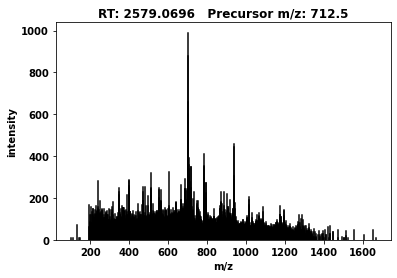

In [163]:
import matplotlib.pyplot as plt


def plot_spectrum(spectrum):
    # plot every peak in spectrum and annotate with it's m/z
    for mz, i in zip(*spectrum.get_peaks()):
        plt.plot([mz, mz], [0, i], color="black")
        # plt.text(mz, i, str(mz))

    # for the title add RT and Precursor m/z if available
    title = ""
    if spectrum.getRT() >= 0:
        title += "RT: " + str(spectrum.getRT())
    if len(spectrum.getPrecursors()) >= 1:
        title += "   Precursor m/z: " + str(spectrum.getPrecursors()[0].getMZ())

    plt.title(title)
    plt.ylabel("intensity")
    plt.xlabel("m/z")
    plt.ylim(bottom=0)

    plt.show()


# plotting out spectrum that was defined earlier
plot_spectrum(demo_spec)

In [178]:
# Explore methods of a spectrum object
get_methods = [method for method in dir(demo_spec) if method.startswith('get')]
for method in get_methods:
    try:
        print(f"demo_spec.{method}()")
        print(eval(f"demo_spec.{method}()"))
        print('--------------')
    except:
        pass

demo_spec.getAcquisitionInfo()
--------------
demo_spec.getComment()

--------------
demo_spec.getDataProcessing()
--------------
demo_spec.getDriftTime()
-1.0
--------------
demo_spec.getFloatDataArrays()
--------------
demo_spec.getInstrumentSettings()
--------------
demo_spec.getIntegerDataArrays()
[]
--------------
demo_spec.getKeys()
demo_spec.getMSLevel()
2
--------------
demo_spec.getMax()
--------------
demo_spec.getMaxInt()
-1.7976931348623157e+308
--------------
demo_spec.getMetaValue()
demo_spec.getMin()
--------------
demo_spec.getMinInt()
1.7976931348623157e+308
--------------
demo_spec.getName()

--------------
demo_spec.getNativeID()
frame=24486_scan=452
--------------
demo_spec.getPeptideIdentifications()
[]
--------------
demo_spec.getPrecursors()
--------------
demo_spec.getProducts()
[]
--------------
demo_spec.getRT()
2579.0696
--------------
demo_spec.getSourceFile()
--------------
demo_spec.getStringDataArrays()
[]
--------------
demo_spec.getType()
0
------------

In [192]:
# Explore precursors derived from the getPrecursor method
prec_methods = [prec for prec in dir(demo_spec.getPrecursors()[0]) if prec.startswith('get')]
prec_spec = demo_spec.getPrecursors()[0]
for method in prec_methods:
    try:
        print(f"prec_spec.{method}()")
        print(eval(f"prec_spec.{method}()"))
        print('--------------')
    except:
        pass

prec_spec.getActivationEnergy()
0.0
--------------
prec_spec.getActivationMethods()
set()
--------------
prec_spec.getCVTerms()
{}
--------------
prec_spec.getCharge()
0
--------------
prec_spec.getDriftTime()
-1.0
--------------
prec_spec.getDriftTimeWindowLowerOffset()
0.0
--------------
prec_spec.getDriftTimeWindowUpperOffset()
0.0
--------------
prec_spec.getIntensity()
0.0
--------------
prec_spec.getIsolationWindowLowerOffset()
12.5
--------------
prec_spec.getIsolationWindowUpperOffset()
12.5
--------------
prec_spec.getKeys()
prec_spec.getMZ()
712.5
--------------
prec_spec.getMetaValue()
prec_spec.getPos()
712.5
--------------
prec_spec.getPossibleChargeStates()
[]
--------------
prec_spec.getUnchargedMass()
1422.985447066458
--------------


## Exploring .osw (OpenSWATH)

In [17]:
import os
import sqlite3

import pandas as pd

def generate_tables():
    with sqlite3.connect(os.path.join(DATA_DIR, 'osw', 'merged_-1.osw')) as con:
        cur = con.cursor()
        cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
        tables = cur.fetchall()
        feature_ms2_table_name = 'FEATURE_MS2'
        score_ms2_table_name = "SCORE_MS2"
        feature_trans_table_name = 'FEATURE_TRANSITION'
        feature_ms2_table = pd.read_sql_query("SELECT * from %s" % feature_ms2_table_name, con, chunksize=10_000)
        score_ms2_table = pd.read_sql_query("SELECT * from %s" % score_ms2_table_name, con, chunksize=10_000)
        feature_trans_table = pd.read_sql_query("SELECT * from %s" % feature_trans_table_name, con, chunksize=10_000)
    return score_ms2_table, feature_ms2_table, feature_trans_table

score_ms2_table, feature_ms2_table, feature_trans_table = generate_tables()

In [85]:
# SCORE_MS2_TABLE AND FEATURE_TABLE DO NOT HAVE MATCHING IDS
def merge_on_col(df1, df2, col):
    return df1.merge(df2, on=col)

# score_ms2_table = next(score_ms2_table).rename(columns={"FEATURE_ID":"ID"})
# merge_on_col(next(feature_table), score_ms2_table, 'ID')

In [79]:
# Get significant ms2 score featues using a Qval cutoff of 0.01
score_ms2_table, _ = generate_tables()
cutoff_qval = 0.01
score_ms2_colnames = ['FEATURE_ID', 'SCORE', 'RANK', 'PVALUE', 'QVALUE', 'PEP']
score_ms2_sig_table = pd.DataFrame(columns=list(score_ms2_colnames))
for chunk in score_ms2_table:
    score_ms2_sig_table = score_ms2_sig_table.append(chunk[chunk['QVALUE'] < cutoff_qval])
score_ms2_sig_table.to_csv(os.path.join(DATA_DIR, "20220119_sig_ms2_score.tsv"), sep="\t", index=False)

In [81]:
score_ms2_sig_table = pd.read_csv(os.path.join(DATA_DIR, "20220119_sig_ms2_score.tsv"), sep="\t")
score_ms2_sig_table.head()

,FEATURE_ID,SCORE,RANK,PVALUE,QVALUE,PEP
0,-6911607367913509504,5.565315,1.0,0.000002,0.000002,0.000004
1,-2481314218077951340,2.418058,1.0,0.012299,0.005370,0.094519
2,5380633255937568871,6.240179,1.0,0.000002,0.000002,0.000004
3,4870883581719333282,5.089730,2.0,0.000008,0.000006,0.000022
4,2662013945061609836,5.028170,3.0,0.000012,0.000008,0.000042


In [180]:
def get_empty_df_from_merged_df(df1, df2, key, nullify_obj=True):
    if nullify_obj:
        df1 = df1.select_dtypes(exclude=['object'])
        df2 = df2.select_dtypes(exclude=['object'])
    colnames = list(merge_on_col(df1, df2, key))
    return pd.DataFrame(columns=colnames)

get_empty_df_from_merged_df(score_ms2_sig_table, next(feature_ms2_table), 'FEATURE_ID')

In [196]:
# Link significant ms2 features using a Qval cutoff of 0.01 TO feature_ms2
# PART 1/2
# JOIN ON COL 'FEATURE_ID'
# DATA GENERATED: 2022-01-19 21:00
# NOTE: FEATURE_MS2 TABLE JOIN MIGHT BE USELESS, BUT IT IS INOCUOUS
import numpy as np

_, feature_ms2_table, _ = generate_tables()
merged_feature_ms2_df = get_empty_df_from_merged_df(score_ms2_sig_table, next(feature_ms2_table), 'FEATURE_ID')
# reset generator
_, feature_ms2_table, _ = generate_tables()

for table_ms2 in feature_ms2_table:
    feature_ms2_chunk = table_ms2.select_dtypes(exclude=['object'])
    merged_feature_ms2_df = merged_feature_ms2_df.append(merge_on_col(score_ms2_sig_table, feature_ms2_chunk, 'FEATURE_ID'))

output_merged_ms2_sigscore_feature_tsv = os.path.join(DATA_DIR, '20220119_merged_ms2_sigscore_and_feature.tsv')
merged_feature_ms2_df.to_csv(output_merged_ms2_sigscore_feature_tsv, sep="\t", index=False)

In [193]:
# Link significant ms2 features using a Qval cutoff of 0.01 TO feature_trans
# PART 2/2
# JOIN ON COL 'FEATURE_ID'
# DATA GENERATED: 2022-01-19 21:00
import numpy as np

_, _, feature_trans_table = generate_tables()
merged_trans_ms2_df = get_empty_df_from_merged_df(score_ms2_sig_table, next(feature_trans_table), 'FEATURE_ID')
# reset generator
_, _, feature_trans_table = generate_tables()

for table_trans in feature_trans_table:
    feature_trans_chunk = table_trans.select_dtypes(exclude=['object'])
    merged_trans_ms2_df = merged_trans_ms2_df.append(merge_on_col(score_ms2_sig_table, feature_trans_chunk, 'FEATURE_ID'))

output_merged_ms2_sigscore_feature_trans_tsv = os.path.join(DATA_DIR, '20220119_merged_ms2_sigscore_and_feature_trans.tsv')
merged_trans_ms2_df.to_csv(output_merged_ms2_sigscore_feature_trans_tsv, sep="\t", index=False)

NameError: name 'score_ms2_signal' is not defined

In [198]:
merged_feature_ms2_df_from_tsv = pd.read_csv(output_merged_ms2_sigscore_feature_tsv, sep="\t")
merged_feature_trans_ms2_df_from_tsv = pd.read_csv(output_merged_ms2_sigscore_feature_trans_tsv, sep="\t")

In [305]:
# NOW LINK PART 1/2 WITH PART 2/2
print(merged_feature_ms2_df_from_tsv.shape)
print(merged_feature_trans_ms2_df_from_tsv.shape)
merged_ms2_score_feature_trans_df = merge_on_col(merged_feature_ms2_df_from_tsv, merged_feature_trans_ms2_df_from_tsv, 'FEATURE_ID')
print(merged_ms2_score_feature_trans_df.shape)

(432402, 33)
(2594412, 10)
(2594412, 42)


In [310]:
# Get left width and right width using FEATURE table
import os
import sqlite3

import pandas as pd


def get_feature_table():
    with sqlite3.connect(os.path.join(DATA_DIR, 'osw', 'merged_-1.osw')) as con:
        cur = con.cursor()
        cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
        feature_table_name = 'FEATURE'
        feature_table = pd.read_sql_query("SELECT * from %s" % feature_table_name, con, chunksize=10_000)
    return feature_table

feature_table = next(get_feature_table()).rename(columns={"ID": "FEATURE_ID"})
merged_ms2_score_feature_trans_df_1 = get_empty_df_from_merged_df(merged_ms2_score_feature_trans_df, feature_table, 'FEATURE_ID')
feature_tables = get_feature_table()
for feature_table in feature_tables:
    feature_table = feature_table.rename(columns={"ID": "FEATURE_ID"})
    merged = merge_on_col(merged_ms2_score_feature_trans_df, feature_table, "FEATURE_ID")
    merged_ms2_score_feature_trans_df_1 = merged_ms2_score_feature_trans_df_1.append(merged)

merged_ms2_score_feature_trans_df_1_tsv = os.path.join(DATA_DIR, '20220120_merged_ms2_sigscore_feature_transition_left_right.tsv')
merged_ms2_score_feature_trans_df_1.to_csv(merged_ms2_score_feature_trans_df_1_tsv, sep="\t", index=False)

In [371]:
temp = merged_ms2_score_feature_trans_df_1
temp["TRANSITION_ID"] = pd.to_numeric(temp["TRANSITION_ID"])

In [372]:
'TRANSITION_ID' in list(temp)

True

In [373]:
def get_trans_table():
    with sqlite3.connect(os.path.join(DATA_DIR, 'osw', 'merged_-1.osw')) as con:
        cur = con.cursor()
        cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
        trans_table_name = 'TRANSITION'
        trans_table = pd.read_sql_query("SELECT * from %s" % trans_table_name, con, chunksize=10_000)
    return trans_table

trans_table = next(get_trans_table()).rename(columns={'ID': 'TRANSITION_ID'})
concat_trans_file = get_empty_df_from_merged_df(temp, trans_table, 'TRANSITION_ID')
# Repeat to reset generator
trans_tables = get_trans_table()
for trans_table in trans_tables:
    trans_table = trans_table.rename(columns={'ID': 'TRANSITION_ID'})
    concat_trans_file = concat_trans_file.append(merge_on_col(temp, trans_table, 'TRANSITION_ID'))
    
concat_trans_file

,SCORE_x,RANK_x,PVALUE_x,QVALUE_x,PEP_x,AREA_INTENSITY_x,TOTAL_AREA_INTENSITY_x,APEX_INTENSITY_x,VAR_BSERIES_SCORE,VAR_DOTPROD_SCORE,...,DETECTING,IDENTIFYING,QUANTIFYING,LIBRARY_INTENSITY,DECOY,FEATURE_ID,RUN_ID,PRECURSOR_ID,TRAML_ID,TYPE
0,3.493925,1.0,0.001039,0.000520,0.009088,3973.03,95677.023444,1271.003643,0.0,0.618550,...,1,0,1,4345.437901,0,-2637720482955779530,-3635800775910245364,541,602898,y
1,3.700001,1.0,0.000588,0.000304,0.005155,4039.00,85178.015162,1140.994478,0.0,0.452547,...,1,0,1,4345.437901,0,-3046407076161730762,552805865418407345,541,602898,y
2,3.493925,1.0,0.001039,0.000520,0.009088,3973.03,95677.023444,1271.003643,0.0,0.618550,...,1,0,1,4061.641745,0,-2637720482955779530,-3635800775910245364,541,602899,y
3,3.700001,1.0,0.000588,0.000304,0.005155,4039.00,85178.015162,1140.994478,0.0,0.452547,...,1,0,1,4061.641745,0,-3046407076161730762,552805865418407345,541,602899,y
4,3.493925,1.0,0.001039,0.000520,0.009088,3973.03,95677.023444,1271.003643,0.0,0.618550,...,1,0,1,3674.092157,0,-2637720482955779530,-3635800775910245364,541,602900,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,2.860631,1.0,0.004681,0.002154,0.039402,1503.00,38053.945044,794.000458,0.0,0.381374,...,1,0,1,2098.692033,1,4755860871468266206,5153584106235113158,289220,DECOY_598195,y
602,2.860631,1.0,0.004681,0.002154,0.039402,1503.00,38053.945044,794.000458,0.0,0.381374,...,1,0,1,10000.000000,1,4755860871468266206,5153584106235113158,289220,DECOY_598196,y
603,2.860631,1.0,0.004681,0.002154,0.039402,1503.00,38053.945044,794.000458,0.0,0.381374,...,1,0,1,6706.302021,1,4755860871468266206,5153584106235113158,289220,DECOY_598197,y
604,2.860631,1.0,0.004681,0.002154,0.039402,1503.00,38053.945044,794.000458,0.0,0.381374,...,1,0,1,2092.746730,1,4755860871468266206,5153584106235113158,289220,DECOY_598198,y


In [3]:
concat_trans_file_tsv = os.path.join(DATA_DIR, '20220120_merged_ms2_sigscore_feature_transition_1.tsv')
# concat_trans_file.to_csv(concat_trans_file_tsv, sep="\t", index=False)

In [4]:
# Narrow retention time window
concat_trans_file = pd.read_csv(concat_trans_file_tsv, sep="\t")
massaged = concat_trans_file[concat_trans_file['EXP_RT'].between(2400, 2700)]

/Users/irahorecka/.virtualenvs/roest-lab/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (58) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
# Give a small width to the PRODUCT_MZ vals - Do 0.001 Da for now
massaged['PRODUCT_MZ_LEFT'] = massaged['PRODUCT_MZ'] - 0.001
massaged['PRODUCT_MZ_RIGHT'] = massaged['PRODUCT_MZ'] + 0.001

trunc_massaged = massaged[['PRODUCT_MZ_LEFT', 'PRODUCT_MZ_RIGHT']]
print(trunc_massaged.shape)

(134172, 2)


/var/folders/qk/0d5w_j9s6t995z3rw3hfgjmm0000gn/T/ipykernel_75091/3084700084.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  massaged['PRODUCT_MZ_LEFT'] = massaged['PRODUCT_MZ'] - 0.001
/var/folders/qk/0d5w_j9s6t995z3rw3hfgjmm0000gn/T/ipykernel_75091/3084700084.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  massaged['PRODUCT_MZ_RIGHT'] = massaged['PRODUCT_MZ'] + 0.001


In [16]:
for exp_idx, exp in enumerate(swath_exp):
    non_found = 0
    found = 0
    for mz in exp.get_peaks()[0]:
        x = trunc_massaged[(mz > trunc_massaged['PRODUCT_MZ_LEFT']) & (mz < trunc_massaged['PRODUCT_MZ_RIGHT'])]
        if x.shape[0] != 0:
            found += 1
        else:
            non_found += 1

    print(f"% of sig peaks identified for exp {exp_idx + 1}:", round(found/(non_found+found)*100, 2))        

% of sig peaks identified for exp 1: 16.57
% of sig peaks identified for exp 2: 16.8
% of sig peaks identified for exp 3: 16.71
% of sig peaks identified for exp 4: 15.86
% of sig peaks identified for exp 5: 14.99
% of sig peaks identified for exp 6: 14.44
% of sig peaks identified for exp 7: 13.71
% of sig peaks identified for exp 8: 13.72
% of sig peaks identified for exp 9: 13.4
% of sig peaks identified for exp 10: 12.4
% of sig peaks identified for exp 11: 12.37
% of sig peaks identified for exp 12: 13.06
% of sig peaks identified for exp 13: 13.34
% of sig peaks identified for exp 14: 13.49
% of sig peaks identified for exp 15: 14.52
% of sig peaks identified for exp 16: 15.25
% of sig peaks identified for exp 17: 16.28
% of sig peaks identified for exp 18: 16.55
% of sig peaks identified for exp 19: 17.15
% of sig peaks identified for exp 20: 17.38
% of sig peaks identified for exp 21: 17.48
% of sig peaks identified for exp 22: 17.25
% of sig peaks identified for exp 23: 18.45


In [34]:
# Now generate non significant score tables
score_ms2_table, _, _ = generate_tables()
score_ms2_df = pd.DataFrame(columns=list(next(score_ms2_table)))
score_ms2_table, _, _ = generate_tables()
for chunk in score_ms2_table:
    score_ms2_df = score_ms2_df.append(chunk)
    
score_ms2_df.shape

(5037530, 6)

In [227]:
import os
import sqlite3

import pandas as pd


mod_swath_tsv = swath_tsv.rename(columns={'id': 'FEATURE_ID'})
trans = merge_on_col(merged_ms2_score_feature_trans_df, mod_swath_tsv, "FEATURE_ID")
# Map these to the transition table to fetch MS2 scans
print(list(trans['TRANSITION_ID'][:10]))

def get_trans_table():
    with sqlite3.connect(os.path.join(DATA_DIR, 'osw', 'merged_-1.osw')) as con:
        cur = con.cursor()
        cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
        trans_table_name = 'TRANSITION'
        trans_table = pd.read_sql_query("SELECT * from %s" % trans_table_name, con, chunksize=10_000)
    return trans_table

trans_table = get_trans_table()
trans = trans.rename(columns={'TRANSITION_ID': 'ID'})
concat_trans_file = get_empty_df_from_merged_df(trans, next(trans_table), 'ID')
# Repeat to reset generator
trans_table = get_trans_table()

for trans_chunk in trans_table:
    concat_trans_file = concat_trans_file.append(merge_on_col(trans, trans_chunk, 'ID'))

concat_trans_file_tsv = os.path.join(DATA_DIR, '20220120_merged_ms2_sigscore_feature_transition.tsv')
concat_trans_file.to_csv(concat_trans_file_tsv, sep="\t", index=False)


[490320, 490321, 490322, 490323, 490324, 490325, 490440, 490441, 490442, 490443]


In [239]:
print(concat_trans_file.shape)
print(swath_tsv[swath_tsv['m_score'] < 0.01].shape)

(1650, 79)
(275, 28)


In [276]:
print(demo_spec.getRT())
print(len(demo_spec.get_peaks()[0]))
x = concat_trans_file[concat_trans_file['RT_leftWidth'] < demo_spec.getRT()]
# print(x['RT_rightWidth'])
y = x[x['RT_rightWidth'] > demo_spec.getRT()]
y.shape

2579.0696
20723


(120, 79)

In [294]:
list(merged_ms2_score_feature_trans_df)
next(trans_table).rename(columns={"ID": "TRANSITION_ID"})
list(merge_on_col(merged_ms2_score_feature_trans_df, next(trans_table).rename(columns={"ID": "TRANSITION_ID"}), 'TRANSITION_ID'))

['FEATURE_ID',
 'SCORE_x',
 'RANK_x',
 'PVALUE_x',
 'QVALUE_x',
 'PEP_x',
 'AREA_INTENSITY_x',
 'TOTAL_AREA_INTENSITY_x',
 'APEX_INTENSITY_x',
 'VAR_BSERIES_SCORE',
 'VAR_DOTPROD_SCORE',
 'VAR_INTENSITY_SCORE',
 'VAR_ISOTOPE_CORRELATION_SCORE',
 'VAR_ISOTOPE_OVERLAP_SCORE',
 'VAR_LIBRARY_CORR',
 'VAR_LIBRARY_DOTPROD',
 'VAR_LIBRARY_MANHATTAN',
 'VAR_LIBRARY_RMSD',
 'VAR_LIBRARY_ROOTMEANSQUARE',
 'VAR_LIBRARY_SANGLE',
 'VAR_LOG_SN_SCORE',
 'VAR_MANHATTAN_SCORE',
 'VAR_MASSDEV_SCORE',
 'VAR_MASSDEV_SCORE_WEIGHTED',
 'VAR_NORM_RT_SCORE',
 'VAR_XCORR_COELUTION',
 'VAR_XCORR_COELUTION_WEIGHTED',
 'VAR_XCORR_SHAPE',
 'VAR_XCORR_SHAPE_WEIGHTED',
 'VAR_YSERIES_SCORE',
 'VAR_IM_XCORR_SHAPE',
 'VAR_IM_XCORR_COELUTION',
 'VAR_IM_DELTA_SCORE',
 'SCORE_y',
 'RANK_y',
 'PVALUE_y',
 'QVALUE_y',
 'PEP_y',
 'TRANSITION_ID',
 'AREA_INTENSITY_y',
 'TOTAL_AREA_INTENSITY_y',
 'APEX_INTENSITY_y',
 'TRAML_ID',
 'PRODUCT_MZ',
 'CHARGE',
 'TYPE',
 'ORDINAL',
 'DETECTING',
 'IDENTIFYING',
 'QUANTIFYING',
 'LIBR